In [4]:
import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')

data = pd.merge(exercise, calories, on='User_ID')


print(data.head())
print('#######################################################')

# converting gender to categorial
enc = preprocessing.LabelEncoder()
enc.fit(['male', 'female'])
data['Gender_Categorial'] = pd.DataFrame(enc.transform(data['Gender']))
# data['Gender_Categorial_Inv'] = pd.DataFrame(enc.inverse_transform(data['Gender_Categorial']))

# creating new features
data['Duration_Sqr'] = data['Duration'] ** 2
data['Heart_Rate_Sqr'] = data['Heart_Rate'] ** 2

''' 
    apply math operation 
    calculate log calories to ensure no negative prediction
'''

# scale value: zscore normalization
zscore_scaler = preprocessing.Normalizer()
data['Height'] = zscore_scaler.fit_transform(data[['Height']])
data['Weight'] = zscore_scaler.fit_transform(data[['Weight']])
data['Heart_Rate'] = zscore_scaler.fit_transform(data[['Heart_Rate']])
data['Heart_Rate_Sqr'] = zscore_scaler.fit_transform(data[['Heart_Rate_Sqr']])
data['Body_Temp'] = zscore_scaler.fit_transform(data[['Body_Temp']])

# scale value: MinMax [Age, Duration, Duration_Sqr]

min_max_scaler = preprocessing.MinMaxScaler()
data['Age'] = min_max_scaler.fit_transform(data[['Age']])
data['Duration'] = min_max_scaler.fit_transform(data[['Duration']])
data['Duration_Sqr'] = min_max_scaler.fit_transform(data[['Duration_Sqr']])

print(data.head())

features = data
del features['User_ID']
del features['Gender']
y = features.Calories




    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
#######################################################
    User_ID  Gender       Age  Height  Weight  Duration  Heart_Rate  \
0  14733363    male  0.813559     1.0     1.0  0.965517         1.0   
1  14861698  female  0.000000     1.0     1.0  0.448276         1.0   
2  11179863    male  0.830508     1.0     1.0  0.137931         1.0   
3  16180408  female  0.237288     1.0     1.0  0.413793         1.0   
4  17771927  female  0.118644     1.0     

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2) 

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [6]:
predictions[0:5]

array([130.,  60.,   4.,  99., 146.])

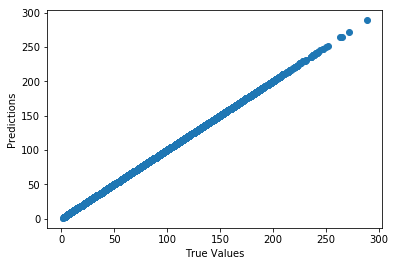

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [11]:
print ('Score:', model.score(X_test, y_test))

Score: 1.0
